# Introduction

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
    

## 1. Bank Marketing dataset:
It contains 41188 and 20 attributes.

In [22]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import scipy.stats as stats
import researchpy as rp
import sklearn
import seaborn as sns


In [23]:
unknown_values = ['unknown', 'NaN']

In [24]:
old = pd.read_csv('bank-additional-full.csv', sep = ';', na_values = unknown_values)
old.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [25]:
old.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [26]:
df = old.dropna()

In [27]:
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)

<ipython-input-27-6821f7cd80eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df['duration'].apply(lambda n:n/60).round(2)


In [28]:
category = pd.cut(df.age, bins = [0,20, 55, 100], labels = ['Teenage', 'Adult', 'Elder'])
df.insert(5, 'Age Group', category)

In [29]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
Age Group         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [30]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

print(rows_with_NaN)

df = df.dropna()

Empty DataFrame
Columns: [age, job, marital, education, default, Age Group, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

[0 rows x 22 columns]


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30488 non-null  int64   
 1   job             30488 non-null  object  
 2   marital         30488 non-null  object  
 3   education       30488 non-null  object  
 4   default         30488 non-null  object  
 5   Age Group       30488 non-null  category
 6   housing         30488 non-null  object  
 7   loan            30488 non-null  object  
 8   contact         30488 non-null  object  
 9   month           30488 non-null  object  
 10  day_of_week     30488 non-null  object  
 11  duration        30488 non-null  float64 
 12  campaign        30488 non-null  int64   
 13  pdays           30488 non-null  int64   
 14  previous        30488 non-null  int64   
 15  poutcome        30488 non-null  object  
 16  emp.var.rate    30488 non-null  float64 
 17  cons.price.i

In [32]:
df

,age,job,marital,education,default,Age Group,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,Elder,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,Adult,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,Adult,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,Elder,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,Elder,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,Elder,yes,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,Adult,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,Elder,yes,no,cellular,nov,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,Adult,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [126]:
df.poutcome.value_counts()

nonexistent    25836
failure         3461
success         1191
Name: poutcome, dtype: int64

In [124]:
df['Age Group'].value_counts()

Adult      37466
Elder       3582
Teenage      140
Name: Age Group, dtype: int64

In [129]:
df.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [130]:
df.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [136]:
df.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [138]:
df.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [144]:
df.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [145]:
df.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [146]:
df.duration.value_counts()

85      170
90      170
136     168
73      167
124     164
       ... 
1108      1
980       1
4918      1
2453      1
2015      1
Name: duration, Length: 1544, dtype: int64

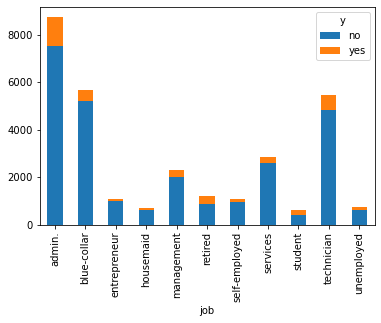

In [28]:
df.groupby(['job','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [29]:
crosstab, test_results, expected = rp.crosstab(df["job"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

y               
y                 no    yes     All
job                                
admin.         24.67   3.99   28.66
blue-collar    17.13   1.48   18.61
entrepreneur    3.24   0.33    3.57
housemaid       1.98   0.29    2.26
management      6.64   0.94    7.58
retired         2.82   1.17    3.99
self-employed   3.15   0.43    3.58
services        8.52   0.85    9.37
student         1.33   0.67    2.00
technician     15.85   2.10   17.95
unemployed      2.01   0.41    2.42
All            87.34  12.66  100.00

In [31]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 10.0) =,730.2239
1,p-value =,0.0000
2,Cramer's V =,0.1548


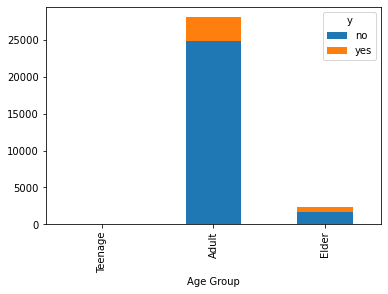

In [34]:
df.groupby(['Age Group','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [35]:
crosstab, test_results, expected = rp.crosstab(df["Age Group"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

y               
y             no    yes     All
Age Group                      
Teenage     0.17   0.10    0.28
Adult      81.50  10.65   92.14
Elder       5.67   1.91    7.58
All        87.34  12.66  100.00

In [36]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,405.1005
1,p-value =,0.0000
2,Cramer's V =,0.1153


In [37]:
crosstab, test_results, expected = rp.crosstab(df["marital"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

y               
y            no    yes     All
marital                       
divorced  10.31   1.34   11.65
married   50.63   6.74   57.37
single    26.40   4.57   30.97
All       87.34  12.66  100.00

In [38]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,54.3936
1,p-value =,0.0000
2,Cramer's V =,0.0422


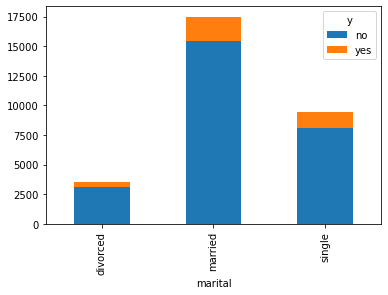

In [39]:
df.groupby(['marital','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

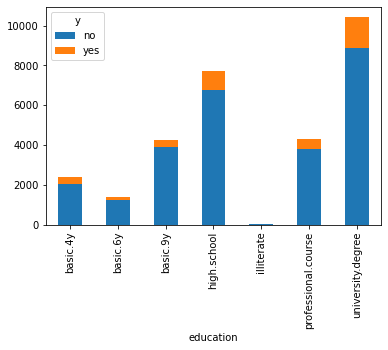

In [40]:
df.groupby(['education','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [41]:
crosstab, test_results, expected = rp.crosstab(df["education"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

y               
y                       no    yes     All
education                                
basic.4y              6.74   1.07    7.81
basic.6y              4.11   0.45    4.56
basic.9y             12.78   1.25   14.03
high.school          22.19   3.06   25.25
illiterate            0.03   0.01    0.04
professional.course  12.41   1.76   14.17
university.degree    29.09   5.06   34.15
All                  87.34  12.66  100.00

In [42]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 6.0) =,115.4927
1,p-value =,0.0000
2,Cramer's V =,0.0615


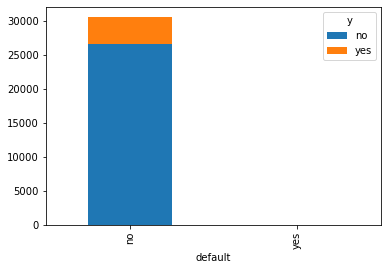

In [43]:
df.groupby(['default','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [44]:
crosstab, test_results, expected = rp.crosstab(df["default"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

y               
y           no    yes     All
default                      
no       87.33  12.66   99.99
yes       0.01   0.00    0.01
All      87.34  12.66  100.00

In [45]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,0.4348
1,p-value =,0.5096
2,Cramer's phi =,0.0038


In [49]:
crosstab, test_results, expected = rp.crosstab(df["housing"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

y               
y           no    yes     All
housing                      
no       40.18   5.63   45.81
yes      47.16   7.03   54.19
All      87.34  12.66  100.00

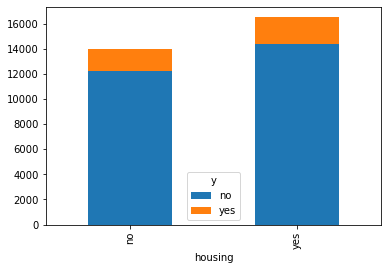

In [46]:
df.groupby(['housing','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [47]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,0.4348
1,p-value =,0.5096
2,Cramer's phi =,0.0038


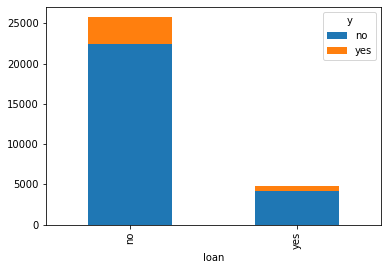

In [48]:
df.groupby(['loan','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [26]:
crosstab, test_results, expected = rp.crosstab(df["loan"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

y               
y        no    yes     All
loan                      
no    74.88   9.58   84.46
yes   13.84   1.70   15.54
All   88.72  11.28  100.00

In [10]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,630.9590
1,p-value =,0.0000
2,Cramer's phi =,0.1439


In [9]:
crosstab, test_results, expected = rp.crosstab(df["contact"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

y               
y             no    yes     All
contact                        
cellular   56.32  10.74   67.05
telephone  31.03   1.92   32.95
All        87.34  12.66  100.00

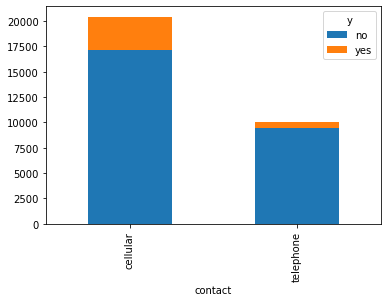

In [51]:
df.groupby(['contact','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [11]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,630.9590
1,p-value =,0.0000
2,Cramer's phi =,0.1439


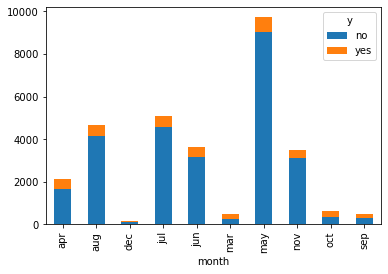

In [53]:
df.groupby(['month','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [54]:
crosstab, test_results, expected = rp.crosstab(df["month"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

y               
y         no    yes     All
month                      
apr     5.40   1.54    6.94
aug    13.58   1.75   15.33
dec     0.27   0.24    0.51
jul    14.99   1.68   16.67
jun    10.37   1.48   11.85
mar     0.77   0.81    1.58
may    29.63   2.30   31.92
nov    10.27   1.20   11.47
oct     1.16   0.94    2.11
sep     0.90   0.73    1.62
All    87.34  12.66  100.00

In [55]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 9.0) =,2358.7894
1,p-value =,0.0000
2,Cramer's V =,0.2782


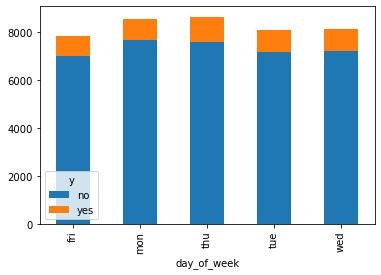

In [11]:
df.groupby(['day_of_week','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [56]:
crosstab, test_results, expected = rp.crosstab(df["day_of_week"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

y               
y               no    yes     All
day_of_week                      
fri          16.59   2.22   18.81
mon          18.28   2.32   20.59
thu          18.09   2.88   20.98
tue          16.94   2.59   19.53
wed          17.44   2.65   20.09
All          87.34  12.66  100.00

In [57]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,25.6693
1,p-value =,0.0000
2,Cramer's V =,0.0290


In [58]:
expected

y            
y                     no         yes
day_of_week                         
fri          5008.222448  725.777552
mon          5484.239406  794.760594
thu          5585.556776  809.443224
tue          5201.249508  753.750492
wed          5349.731862  775.268138

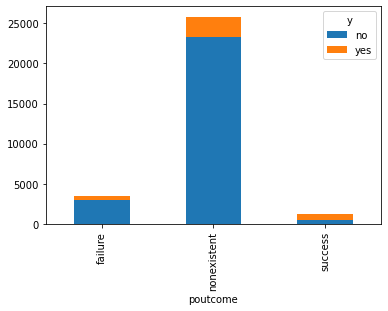

In [59]:
df.groupby(['poutcome','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [60]:
crosstab, test_results, expected = rp.crosstab(df["poutcome"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

y               
y               no    yes     All
poutcome                         
failure       9.69   1.67   11.35
nonexistent  76.31   8.44   84.74
success       1.35   2.56    3.91
All          87.34  12.66  100.00

In [61]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,3181.0924
1,p-value =,0.0000
2,Cramer's V =,0.3230


Logistic Regression

Default, Housing, Loan, poutcome, euribor3m

In [35]:
train = df

In [36]:
train.head()

,age,job,marital,education,default,Age Group,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,Elder,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,Adult,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,Adult,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,Elder,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,Elder,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [37]:
dataset1 = train[['age', 'job', 'education', 'default', 'housing', 'loan']]
y = train[['y']]
dataset1.head()

,age,job,education,default,housing,loan
0,56,housemaid,basic.4y,no,no,no
2,37,services,high.school,no,yes,no
3,40,admin.,basic.6y,no,no,no
4,56,services,high.school,no,no,yes
6,59,admin.,professional.course,no,no,no


In [38]:
dataset2 = pd.get_dummies(dataset1, columns = ['job'])
dataset2 = pd.get_dummies(dataset2, columns = ['education'])
dataset2['housing'] = dataset2['housing'].map({'yes': 1, 'no': 0})
dataset2['default'] = dataset2['default'].map({'yes': 1, 'no': 0})
dataset2['loan'] = dataset2['loan'].map({'yes': 1, 'no': 0})
dataset_response = y['y'].map({'yes': 1, 'no': 0})
dataset3= pd.merge(dataset2, dataset_response, left_index = True, right_index = True) 

In [39]:
dataset3.head()

,age,default,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,job_technician,job_unemployed,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,y
0,56,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,37,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,59,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
array = dataset3.values

# Features: first 20 columns
X = array[:,0:-1]

# Target variable: 'response_binary'
Y = array[:,-1]

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [19]:
# 20% of the data will be used for testing
test_size= 0.20
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=test_size, random_state=None)

NameError: name 'Y' is not defined

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [165]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [166]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, random_state=None)    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

LR: 0.874983 (0.008527)
KNN: 0.861254 (0.009368)
CART: 0.860925 (0.008993)
NB: 0.482917 (0.049797)


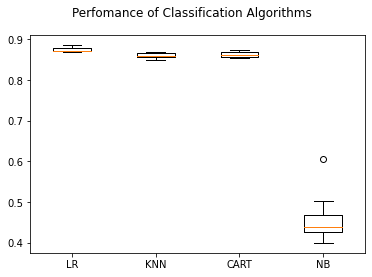

In [163]:
fig = plt.figure()
fig.suptitle('Perfomance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.show()

In [164]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [165]:
predictions = LR.predict(X_test)

In [166]:
# Accuracy Score 
print(accuracy_score(Y_test, predictions))


0.8701213512627091


[[5306    0]
 [ 792    0]]


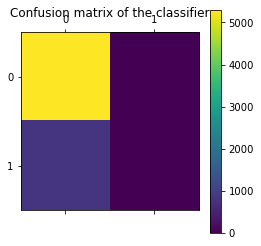

In [167]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(Y_test, predictions))

cm = confusion_matrix(Y_test, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [175]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

NameError: name 'predictions' is not defined

In [169]:
KN = KNeighborsClassifier()
KN.fit(X_train, Y_train) 

KNeighborsClassifier()

In [170]:
predictions = KN.predict(X_test)

In [171]:
print(accuracy_score(Y_test, predictions))

0.8611020006559528


[[5211   95]
 [ 752   40]]


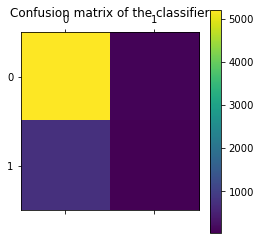

In [172]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(Y_test, predictions))

cm = confusion_matrix(Y_test, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [173]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      5306
           1       0.30      0.05      0.09       792

    accuracy                           0.86      6098
   macro avg       0.59      0.52      0.51      6098
weighted avg       0.80      0.86      0.82      6098



0.8617579534273533
[[5200  106]
 [ 737   55]]


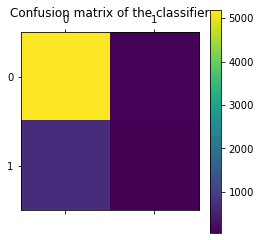

In [175]:
DC = DecisionTreeClassifier()
DC.fit(X_train, Y_train)

predictions = DC.predict(X_test)

print(accuracy_score(Y_test, predictions))

# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(Y_test, predictions))

cm = confusion_matrix(Y_test, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

0.4386684158740571
[[2097 3209]
 [ 214  578]]


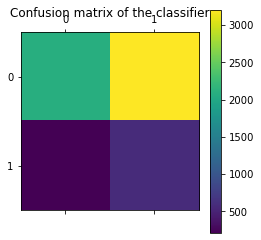

In [176]:
GNB = GaussianNB()
GNB.fit(X_train, Y_train)

predictions = GNB.predict(X_test)

print(accuracy_score(Y_test, predictions))

# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(Y_test, predictions))

cm = confusion_matrix(Y_test, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [181]:
df['job'].value_counts().index


Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid',
       'student'],
      dtype='object')

In [183]:
total_count_in_each_group=[]
yes_count=[]
no_count=[]
title=[]
for i in df['job'].value_counts().index:
  df_job=pd.DataFrame()
  df_job=df[df['job']==i]
  title.append(i)
  total_count_in_each_group.append(df_job.shape[0])
  yes_count.append(df_job[df_job['y']=='yes'].count()['y'])
  no_count.append(df_job[df_job['y']=='no'].count()['y'])
df_jobs=pd.DataFrame()
df_jobs['Job Title']=title
df_jobs['Total']=total_count_in_each_group
df_jobs['Yes']=yes_count
df_jobs['No']=no_count
df_jobs

,Job Title,Total,Yes,No
0,admin.,8737,1216,7521
1,blue-collar,5675,452,5223
2,technician,5473,641,4832
3,services,2857,258,2599
4,management,2311,286,2025
5,retired,1216,357,859
6,self-employed,1092,132,960
7,entrepreneur,1089,101,988
8,unemployed,738,126,612
9,housemaid,690,87,603


([<matplotlib.axis.XTick at 0x1f562cfb7f0>,
 [Text(0, 0, 'admin.'),
  Text(0, 0, 'blue-collar'),
  Text(0, 0, 'technician'),
  Text(0, 0, 'services'),
  Text(0, 0, 'management'),
  Text(0, 0, 'retired'),
  Text(0, 0, 'self-employed'),
  Text(0, 0, 'entrepreneur'),
  Text(0, 0, 'unemployed'),
  Text(0, 0, 'housemaid'),
  Text(0, 0, 'student')])

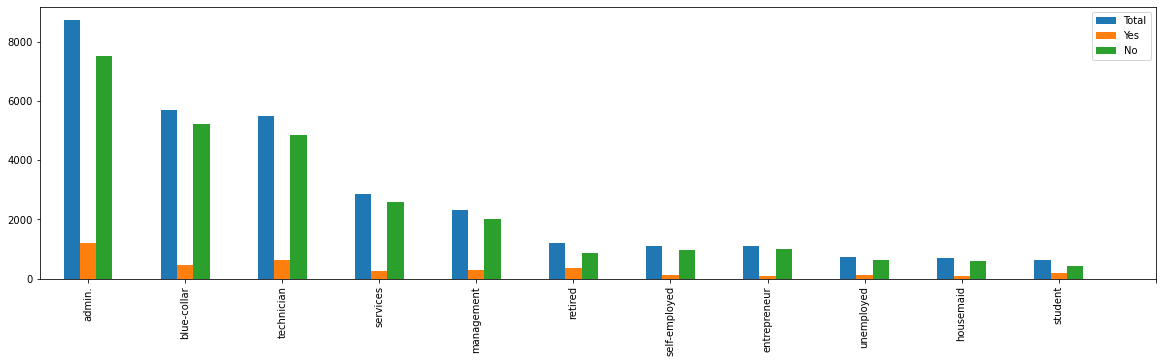

In [184]:
labels=df_jobs['Job Title']
positions = np.arange(0,12,1)
df_jobs.plot(kind='bar',figsize=(20,5))
plt.xticks(positions, labels)

In [185]:
df_jobs_final=pd.DataFrame()
df_jobs_final['Job Title']=title
df_jobs_final['Percentage_yes']=(df_jobs['Yes']/df_jobs['Total'])*100
df_jobs_final['Percentage_no']=(df_jobs['No']/df_jobs['Total'])*100
df_jobs_final=df_jobs_final.sort_values('Percentage_yes',ascending=False)
df_jobs_final

,Job Title,Percentage_yes,Percentage_no
10,student,33.278689,66.721311
5,retired,29.358553,70.641447
8,unemployed,17.073171,82.926829
0,admin.,13.917821,86.082179
9,housemaid,12.608696,87.391304
4,management,12.375595,87.624405
6,self-employed,12.087912,87.912088
2,technician,11.712041,88.287959
7,entrepreneur,9.274564,90.725436
3,services,9.030452,90.969548


([<matplotlib.axis.XTick at 0x1f5627efd00>,
 [Text(0, 0, 'student'),
  Text(0, 0, 'retired'),
  Text(0, 0, 'unemployed'),
  Text(0, 0, 'admin.'),
  Text(0, 0, 'housemaid'),
  Text(0, 0, 'management'),
  Text(0, 0, 'self-employed'),
  Text(0, 0, 'technician'),
  Text(0, 0, 'entrepreneur'),
  Text(0, 0, 'services'),
  Text(0, 0, 'blue-collar')])

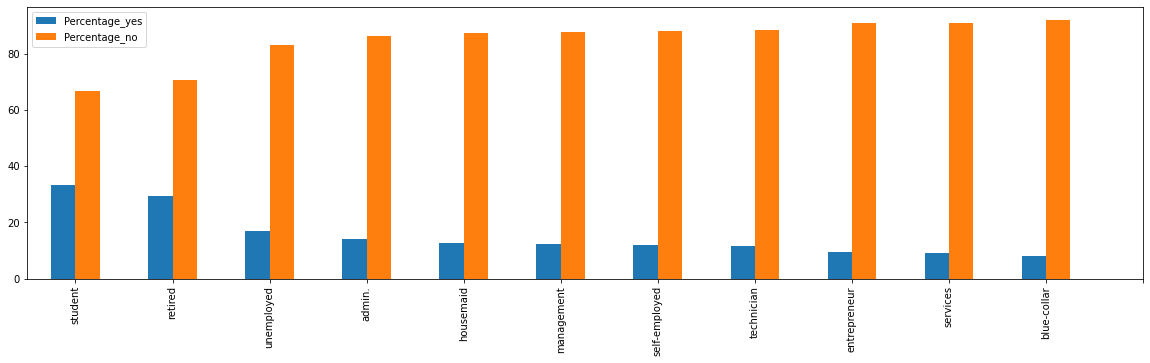

In [186]:
labels=df_jobs_final['Job Title'].tolist()
position=df_jobs_final['Job Title'].index
df_jobs_final.plot(kind='bar',figsize=(20,5))
plt.xticks(positions, labels)

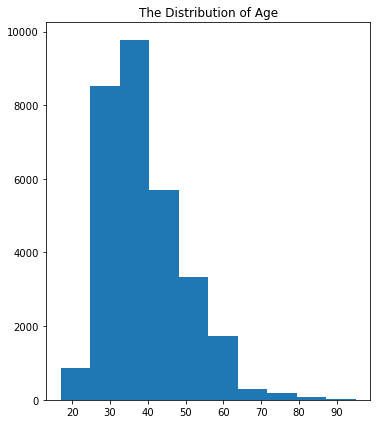

In [195]:
dist_age = plt.figure(figsize = (10,6))

ra1 = dist_age.add_subplot(1,2,1) 

ra1.hist(df['age'])
ra1.set_title('The Distribution of Age')

plt.tight_layout() 
plt.show()

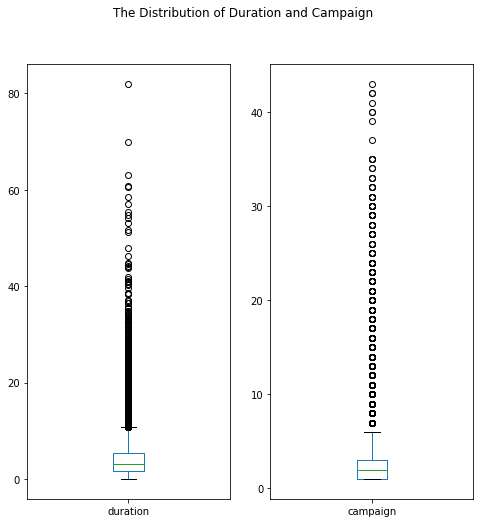

In [15]:
dist_dur_cam = df[['duration','campaign']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

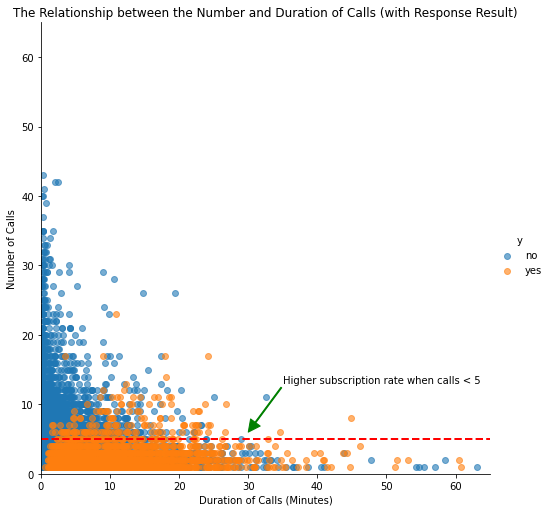

In [19]:
dur_cam = sns.lmplot(x='duration', y='campaign',data = df,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="r", linestyle='--')
plt.annotate('Higher subscription rate when calls < 5',xytext = (35,13),
             arrowprops=dict(color = 'g', width=1),xy=(30,6))
plt.show()


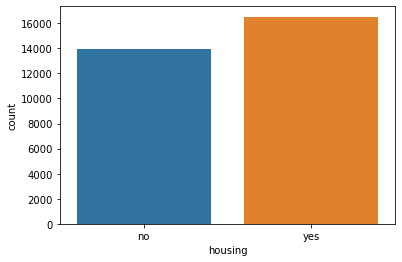

In [21]:
sns.countplot(df['housing'])

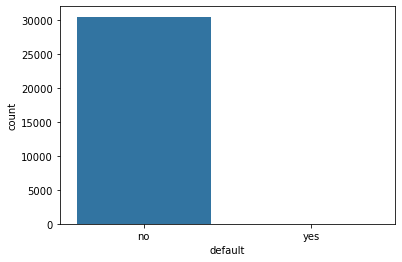

In [22]:
sns.countplot(df['default'])

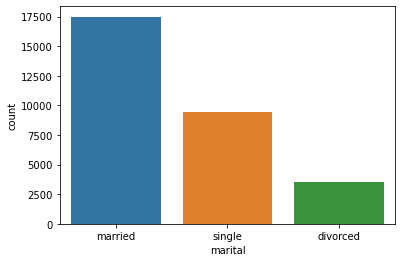

In [24]:
sns.countplot(df['marital'])

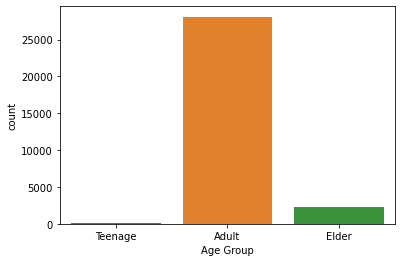

In [27]:
sns.countplot(df['Age Group'])

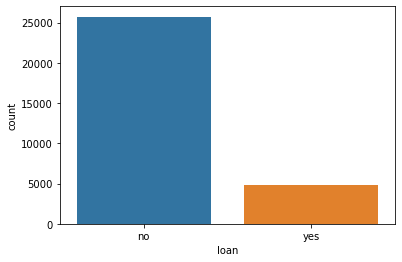

In [29]:
sns.countplot(df['loan'])

In [136]:
df.month.value_counts()

may    9733
jul    5081
aug    4673
jun    3614
nov    3496
apr    2115
oct     642
sep     495
mar     482
dec     157
Name: month, dtype: int64

In [170]:
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [168]:
log_reg.score(X_train,Y_train)

0.8749824281898693

In [171]:
log_reg.fit(X_test,Y_test)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [172]:
log_reg.score(X_test,Y_test)

0.8697933748770088

In [173]:
log_reg = log_reg.predict(X_test)

In [176]:
from sklearn.metrics import classification_report

print(classification_report(log_reg,Y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93      9147
         1.0       0.00      0.00      0.00         0

    accuracy                           0.87      9147
   macro avg       0.50      0.43      0.47      9147
weighted avg       1.00      0.87      0.93      9147



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
sns.regplot(x='balance', y='default', data=data, logistic=True)

In [14]:
df['y'].value_counts()

no     26629
yes     3859
Name: y, dtype: int64

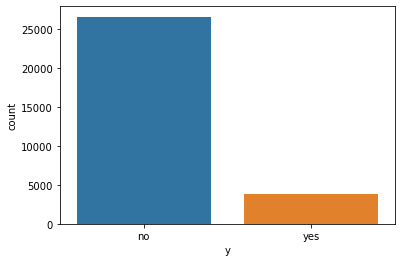

In [17]:
sns.countplot(df['y'])

In [33]:
count_no_sub = len(df[df['y']=='no'])
count_sub = len(df[df['y']=='yes'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 87.34256100760956
percentage of subscription 12.65743899239045


In [47]:
X = dataset3.loc[:, dataset3.columns != 'y']
y = dataset3.loc[:, dataset3.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  37236
Number of no subscription in oversampled data 18618
Number of subscription 18618
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [52]:
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.2, random_state=None)


In [60]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
log_reg.score(X_train,y_train)

0.6588559151336109

In [62]:
y_pred = log_reg.predict(X_test)

In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.70      0.67      3782
           1       0.66      0.61      0.63      3666

    accuracy                           0.66      7448
   macro avg       0.66      0.66      0.65      7448
weighted avg       0.66      0.66      0.65      7448



In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2658 1124]
 [1440 2226]]


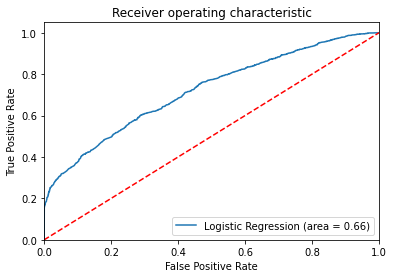

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()